In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow
import warnings
warnings.filterwarnings("ignore")



# 1. Load your zillow dataset.


In [2]:
df=wrangle_zillow()
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,tax_amnt,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [3]:
train_validate, test = train_test_split(df, test_size=.2, random_state=99)
train, validate = train_test_split(train_validate, test_size=.3, random_state=99)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [4]:
target = ['tax_value']
features = ['sq_ft']

In [5]:
x_train = train[features]
y_train = train[target]

x_validate = validate[features]
y_validate = validate[target]

x_test = test[features]
y_test = test[target]

In [7]:
x_train.head()

,sq_ft
810206,1545
37601,1355
561413,1027
619906,1220
1387153,2946


In [27]:
y_train.mean()

tax_value    398786.782286
dtype: float64

# 2. 

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

Here is some sample code to get you started:

In [9]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_train)

LinearRegression()

In [11]:
results = pd.DataFrame(columns=['x', 'y', 'yhat', 'predictions'])

In [28]:
results['x'] = x_train
results['y'] = y_train
results['yhat'] = yhat = y_train.mean()
results['predictions'] = predictions

In [29]:
results.head()

,x,y,yhat,predictions
810206,1545,81163,NaN,340453.425494
37601,1355,75541,NaN,296497.235223
561413,1027,299268,NaN,220614.969912
619906,1220,230320,NaN,265265.205293
1387153,2946,418759,NaN,664572.491653


NameError: name 'yhat' is not defined

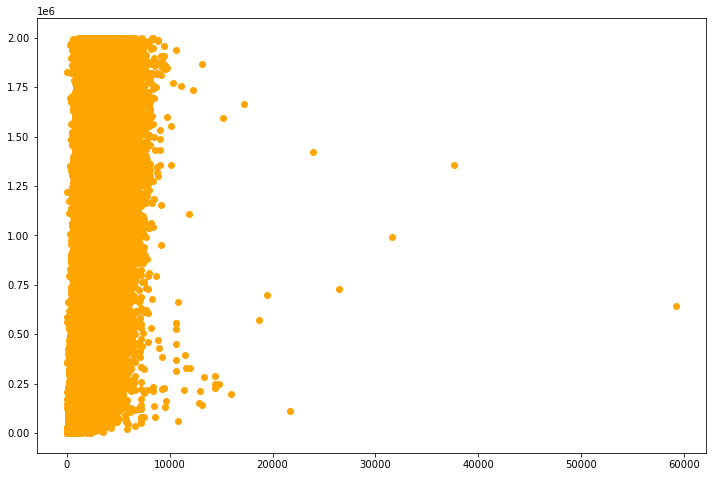

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(results.x, results.y, c='orange')
plt.plot(results.x, results.yhat, c='grey', ls='-')
plt.show()

In [ ]:
sns.scatterplot(x = 'x' , y = 'y', data = t)
sns.lineplot(x = 'total_bill', y = 'baseline', data = tips)
sns.lineplot(x = 'total_bill', y = 'yhat', data = tips)

# 3. 

Plot the residuals for the linear regression model that you made.

# 4.
Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

# 5. 

'Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

# 6. 

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

# 7.

What is the amount of variance explained in your model?

# 8.

Is your model better than the baseline model?



# 9.

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
